### Imports

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
import scipy.stats as stats
import pylab

In [275]:
def plot_qq(df,feature):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist= 'norm', plot=pylab)
    plt.show()

## Read Data

In [276]:
df = pd.read_csv('forbes_billionaires.csv')
#df = pd.read_csv("../input/forbes-billionaires-of-2021-20/forbes_billionaires.csv")

categorical_columns = df.dtypes[df.dtypes == 'object'].index
numerical_columns = df.dtypes[df.dtypes != 'object'].index    

In [277]:
df.head(2)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True


In [278]:
df.shape

(2755, 12)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2755 non-null   object 
 1   NetWorth     2755 non-null   float64
 2   Country      2755 non-null   object 
 3   Source       2755 non-null   object 
 4   Rank         2755 non-null   int64  
 5   Age          2630 non-null   float64
 6   Residence    2715 non-null   object 
 7   Citizenship  2739 non-null   object 
 8   Status       2090 non-null   object 
 9   Children     1552 non-null   float64
 10  Education    1409 non-null   object 
 11  Self_made    2737 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 258.4+ KB


<AxesSubplot:>

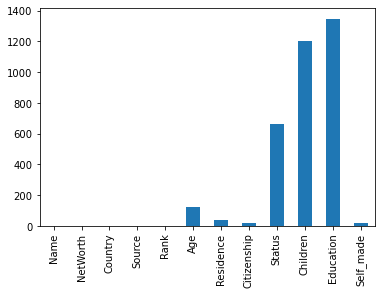

In [280]:
df.isnull().sum().plot(kind = 'bar')

In [281]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

Education      48.856624
Children       43.666062
Status         24.137931
Age             4.537205
Residence       1.451906
Self_made       0.653358
Citizenship     0.580762
Rank            0.000000
Source          0.000000
Country         0.000000
NetWorth        0.000000
Name            0.000000
dtype: float64

Children and Education columns has more than 40% of the data missing so we will dropt those columns

In [282]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NetWorth,2755.0,4.749220,9.615358,1.0,1.5,2.3,4.2,177.0
Rank,2755.0,1345.663521,772.669811,1.0,680.0,1362.0,2035.0,2674.0
Age,2630.0,63.267300,13.479160,18.0,54.0,63.0,73.0,99.0
Children,1552.0,2.978093,1.618569,1.0,2.0,3.0,4.0,23.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

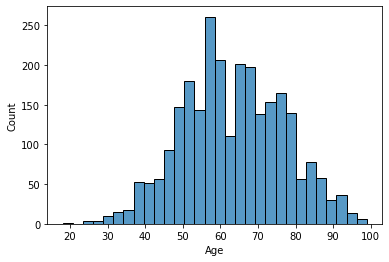

In [283]:
sns.histplot(x = 'Age', data = df)

## Handling Null Values

#### Transforming Residence column into City and State column 

In [284]:
#df["Residence"].value_counts()[df["Residence"].value_counts() > 10]

In [285]:
df[['City','State','Null']] = df.Residence.apply(lambda x: pd.Series(str(x).split(',')))

In [286]:
df.head(2)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,City,State,Null
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,Seattle,Washington,NaN
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,Austin,Texas,NaN


In [287]:
df.shape

(2755, 15)

Here Null column has all the null values so dropping that along with children and education and Residence

In [288]:
#df[df.Null.notnull()]

Filling State null values with country values

In [289]:
#df[df.State.isnull()]

In [290]:
df.loc[df['State'].isnull(),'State'] = df['Country']

Similarly filling null city values with state values; here null values are represented as nan

In [291]:
df.loc[df['City']== 'nan','City'] = df['State']

#### Dropping columns

In [292]:
df.drop(['Null','Children','Education','Residence'], axis =1, inplace = True)

Checking rest of the columns

<AxesSubplot:>

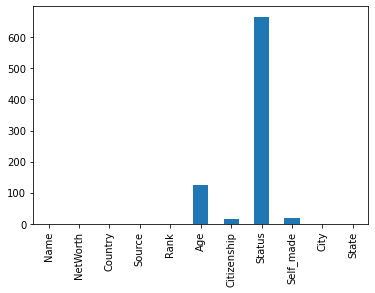

In [293]:
df.isnull().sum().plot(kind = 'bar')

In [294]:
df['Status'].value_counts()

Married               1734
Divorced               144
Widowed                 95
Single                  74
In Relationship         21
Separated               10
Widowed, Remarried       8
Engaged                  4
Name: Status, dtype: int64

Majority of the people are married

In [295]:
df['Status'].isnull().sum()

665

In [296]:
#Adding an extra column where status has null values
#df['Status_Null'] = np.where(df['Status'].isnull(), 1, 0)

In [297]:
#df['Status_Null'].value_counts()

We will fill the missing values as their own category as Unknown

In [298]:
df['Status'] = np.where(df['Status'].isnull(), 'Unknown', df['Status'])

In [299]:
#df.loc[df['Status'].isnull(),'Status'] = 'Unknown'

In [300]:
df['Status'].value_counts()

Married               1734
Unknown                665
Divorced               144
Widowed                 95
Single                  74
In Relationship         21
Separated               10
Widowed, Remarried       8
Engaged                  4
Name: Status, dtype: int64

In [314]:
#df.isnull().sum().plot(kind = 'bar')

Now age colunmn

<AxesSubplot:>

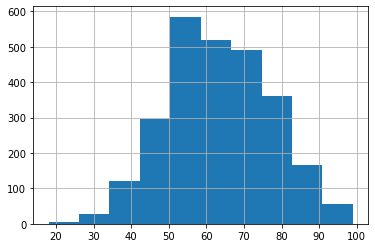

In [302]:
df['Age'].hist()

Looks like normal dist lets check with qq plot

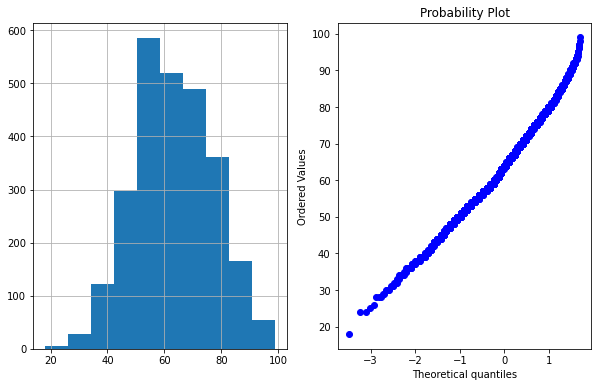

In [303]:
plot_qq(df,'Age')

It is a normal distribution

add a column which take records age missing values 

In [304]:
df['Age_Null'] = np.where(df['Age'].isnull(), 1, 0)

replacing age null values with random values from the age distribition

In [305]:
def na_randomfill(series):
    na_mask = pd.isnull(series)   # boolean mask for null values
    n_null = na_mask.sum()        # number of nulls in the Series
    
    if n_null == 0:
        return series             # if there are no nulls, no need to resample
    
    # Randomly sample the non-null values from our series
    #  only sample this Series as many times as we have nulls 
    fill_values = series[~na_mask].sample(n=n_null, replace=True, random_state=0)

    # This ensures our new values will replace NaNs in the correct locations
    fill_values.index = series.index[na_mask]
    
    return series.fillna(fill_values) 

In [306]:
df["Age_new"] = na_randomfill(df["Age"])

In [307]:
# Dropping age columns
df.drop('Age', axis = True, inplace=True)

In [315]:
#df.isnull().sum().plot(kind = 'bar')

Citizenshipo and self made null values are so low we can directly drop those rows for now and we might work on them later if we want to improve the performance of the mdoel

In [309]:
df.dropna(axis = 0, how='any', inplace =True)

## EDA

In [313]:
#### Work in Progress